In [12]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
%matplotlib inline

In [13]:
# Loading data
sleep_df = pd.read_csv("sleep_df_cleandrop.csv")

sleep_df.head()

,Sleep duration,Caffeine consumption,Alcohol consumption,Exercise frequency,Female,Male,Late Bedtime,Normal Bedtime,Really Late Bedtime,Non-Smoker,Smoker,Early Wakeup,Late Wakeup,Normal Wakeup,Very Early Wakeup,Efficient
0,7.5,50,0,1,1,0,0,0,1,1,0,1,0,0,0,1
1,5.5,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
2,7.0,0,5,2,1,0,0,0,1,0,1,0,0,1,0,1
3,8.0,0,0,3,0,1,0,0,1,0,1,0,0,1,0,0
4,9.0,75,0,2,1,0,0,1,0,0,1,0,0,0,1,1


In [14]:
# Define features set
X = sleep_df.copy()
X.drop("Efficient", axis=1, inplace=True)
X.head()

,Sleep duration,Caffeine consumption,Alcohol consumption,Exercise frequency,Female,Male,Late Bedtime,Normal Bedtime,Really Late Bedtime,Non-Smoker,Smoker,Early Wakeup,Late Wakeup,Normal Wakeup,Very Early Wakeup
0,7.5,50,0,1,1,0,0,0,1,1,0,1,0,0,0
1,5.5,0,0,0,0,1,0,0,1,1,0,0,0,1,0
2,7.0,0,5,2,1,0,0,0,1,0,1,0,0,1,0
3,8.0,0,0,3,0,1,0,0,1,0,1,0,0,1,0
4,9.0,75,0,2,1,0,0,1,0,0,1,0,0,0,1


In [15]:
# Define target vector
y = sleep_df["Efficient"].ravel()
y[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [16]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, class_weight={0:1, 1:3}, random_state=72)

In [19]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,20,12
Actual 1,5,62


Accuracy Score : 0.8282828282828283
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.84      0.93      0.88        67

    accuracy                           0.83        99
   macro avg       0.82      0.78      0.79        99
weighted avg       0.83      0.83      0.82        99



In [27]:
answers = []

while True:
    
    z = int(input("How many hours do you plan to sleep tonight (1-10) : "))
    answers.append(z)

    a = int(input("Enter how many cups of coffee and or soda you have had today: "))
    answers.append(a*25)
    
    b = int(input("Enter how many drinks of alcohol you've had today. : "))
    answers.append(b)
    
    c = int(input("Enter how many times a week you excercise. : "))
    answers.append(c)
    
    d = input("Are you Male or Female? : ")
    if d == "Male" or "male":
        answers.append(1)
        answers.append(0)
    else:
        answers.append(0)
        answers.append(1)

    
    f = input("What time will you be going to sleep? Normal(9-1030pm) Late(11pm-1230am) Really Late(1-2:30am)? : ")

    if f == "Normal" or "normal":
        answers.append(0)
        answers.append(1)
        answers.append(0)
    elif f == "Late" or ("late"):
        answers.append(1)
        answers.append(0)
        answers.append(0)
    else:
        answers.append(0)
        answers.append(0)
        answers.append(1)
        
    
    i = input("Are you a Smoker? Yes or No? : ")
    if i == "yes" or "Yes":
        answers.append(0)
        answers.append(1)
    else:
        answers.append(1)
        answers.append(0)
        
    
    k = input("What time are you planning on waking up? Very Early(3-5am) Early(5-8am) Normal(8-11am) Late(11am-1pm)? : ")
    if k == "Early" or "early":
        answers.append(1)
        answers.append(0)
        answers.append(0)
        answers.append(0)
        
    elif k == "Normal" or ("normal"):
        answers.append(0)
        answers.append(0)
        answers.append(1)
        answers.append(0)
    
    elif k == "Late" or ("late"):
        answers.append(0)
        answers.append(1)
        answers.append(0)
        answers.append(0)
        
    else:
        answers.append(0)
        answers.append(0)
        answers.append(0)
        answers.append(1)

    break
 
print(answers)

How many hours do you plan to sleep tonight (1-10) : 8
Enter how many cups of coffee and or soda you have had today: 1
Enter how many drinks of alcohol you've had today. : 3
Enter how many times a week you excercise. : 3
Are you Male or Female? : male
What time will you be going to sleep? Normal(9-1030pm) Late(11pm-1230am) Really Late(1-2:30am)? : late
Are you a Smoker? Yes or No? : yes
What time are you planning on waking up? Very Early(3-5am) Early(5-8am) Normal(8-11am) Late(11am-1pm)? : early
[8, 25, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]


In [28]:
import numpy as np
arr = np.array(answers)

arr1 = arr.reshape(1, -1)

print(arr1)

[[ 8 25  3  3  1  0  0  1  0  0  1  1  0  0  0]]


In [29]:
#features = np.array([[25, 5, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]])
features = arr1
# using inputs to predict the output
prediction = rf_model.predict(features)

if prediction == 0:
    print("Inefficient")
else: 
    print("Efficient")
    
#print("Prediction: {}".format(prediction))

Inefficient


In [30]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2975577232821733, 'Alcohol consumption'),
 (0.17186076891677746, 'Sleep duration'),
 (0.15448142511176158, 'Exercise frequency'),
 (0.08697208334681084, 'Caffeine consumption'),
 (0.0391342808840529, 'Smoker'),
 (0.036088670950969695, 'Non-Smoker'),
 (0.03087565421520231, 'Late Bedtime'),
 (0.030791554595567962, 'Early Wakeup'),
 (0.026887181212141335, 'Really Late Bedtime'),
 (0.02666118764922519, 'Female'),
 (0.026366365034806806, 'Male'),
 (0.02580321521986642, 'Normal Wakeup'),
 (0.021055667174138353, 'Normal Bedtime'),
 (0.02013098261014277, 'Very Early Wakeup'),
 (0.00533323979636317, 'Late Wakeup')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

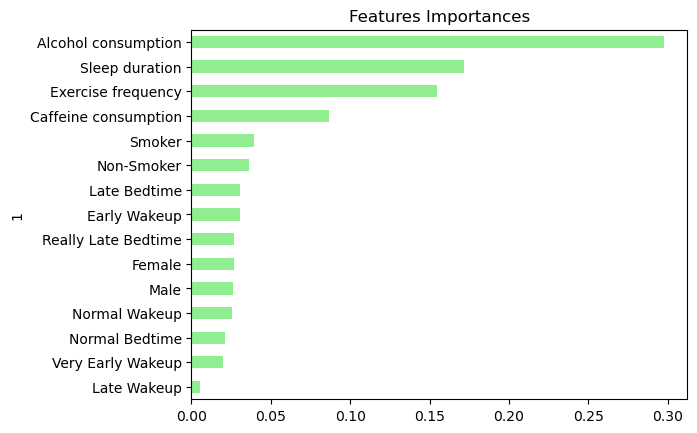

In [31]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)